In [1]:
using Plots
theme(:dark)

In [2]:
X = [(1.0, 2.0), (2.0, 1.0), (2.0, 4.0), (3.0, 1.0), (3.0, 2.0), (3.0, 3.0), 
        (4.0, 2.0), (4.0, 3.0), (4.0, 5.0), (5.0, 3.0), (6.0, 1.0), (6.0, 3.0),(6.0, 4.0)]
y = [1, 1, 1, -1, -1, 1, -1, 1, 1, -1, -1, -1, 1];

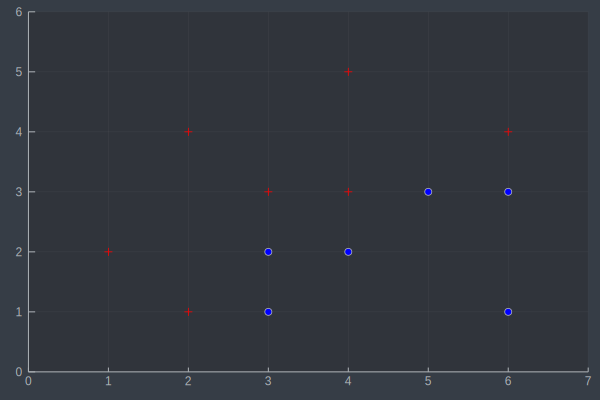

In [3]:
plot(legend = false, xlim = (0, 7), ylim = (0, 6))
for i = 1:length(X)
    if y[i] == 1
        scatter!([X[i]],
        color = :red, 
        shape = :cross)
    else
        scatter!([X[i]], 
        color = :blue,
        shape = :circle)
    end
end
scatter!()

In [4]:
# Define indicator function 
I(x,y) = x != y ? 1.0 : 0.0

# Define stump classifier
c(x, j, θ) = x[j] > θ ? 1.0 : -1.0

function train(X, w, y)
    # Determine the number of data points
    N = length(X)
    
    # Assign points as keys for both labels and weights
    y_labels = Dict(X[i] => y[i] for i = 1:N)
    w_labels = Dict(X[i] => w[i] for i = 1:N)
    
    # Will store cumulative sums in the following dictionary
    cumulative_sums = Dict()
    
    # Copy X, since we do not want to modify X
    X_temp = copy(X)
    
    
    for i = 1:2 
        sort!(X_temp, by = x -> x[i])
        ith_cumulative_sum = []
        
        for j = 1:N
            jth_cumulative_sum = sum(w_labels[X_temp[k]]*y_labels[X_temp[k]] for k = 1:j)
            push!(ith_cumulative_sum, jth_cumulative_sum)
        end
        #println(ith_cumulative_sum)
        cumulative_sums[i] = extrema(ith_cumulative_sum)
    end

    # Find the extrema for each of the ith entries
    theta_vals = [maximum(abs.(cumulative_sums[i])) for i = 1:2]
    
    #println(theta_vals)
    minimize = []
    for j = 1:2
        temp_val = sum(w_labels[X[i]]*I(y_labels[X[i]], c(X[i], j, theta_vals[j])) for i = 1:N)
        push!(minimize, temp_val)
    end
    j = argmin(minimize)
    θ = theta_vals[j]
                            
    return j, θ
end

train (generic function with 1 method)

In [5]:
w = [1/length(X) for _ in 1:length(X)]
j1, θ1 = train(X, w, y)

(1, 0.23076923076923078)

In [6]:
ϵ1 = sum(w[i]*I(y[i], c(X[i], j1, θ1)) for i = 1:length(X))/sum(w)

0.4615384615384617

In [7]:
α1 = log((1-ϵ1)/ϵ1)

0.1541506798272578

In [8]:
w = [w[i]*exp(α1*I(y[i], c(X[i], j1, θ1))) for i = 1:length(X)]

13-element Array{Float64,1}:
 0.07692307692307693
 0.07692307692307693
 0.07692307692307693
 0.0897435897435897 
 0.0897435897435897 
 0.07692307692307693
 0.0897435897435897 
 0.07692307692307693
 0.07692307692307693
 0.0897435897435897 
 0.0897435897435897 
 0.0897435897435897 
 0.07692307692307693

In [9]:
j2, θ2 = train(X, w, y)

(1, 0.23076923076923078)

In [10]:
ϵ2 = sum(w[i]*I(y[i], c(X[i], j2, θ2)) for i = 1:length(X))/sum(w)
α2 = log((1-ϵ2)/ϵ2)
w = [w[i]*exp(α2*I(y[i], c(X[i], j2, θ2))) for i = 1:length(X)]

13-element Array{Float64,1}:
 0.07692307692307693
 0.07692307692307693
 0.07692307692307693
 0.0897435897435897 
 0.0897435897435897 
 0.07692307692307693
 0.0897435897435897 
 0.07692307692307693
 0.07692307692307693
 0.0897435897435897 
 0.0897435897435897 
 0.0897435897435897 
 0.07692307692307693

In [11]:
j3, θ3 = train(X, w, y)
ϵ3 = sum(w[i]*I(y[i], c(X[i], j3, θ3)) for i = 1:length(X))/sum(w)
α3 = log((1-ϵ3)/ϵ3)
w = [w[i]*exp(α3*I(y[i], c(X[i], j3, θ3))) for i = 1:length(X)]

13-element Array{Float64,1}:
 0.07692307692307693
 0.07692307692307693
 0.07692307692307693
 0.0897435897435897 
 0.0897435897435897 
 0.07692307692307693
 0.0897435897435897 
 0.07692307692307693
 0.07692307692307693
 0.0897435897435897 
 0.0897435897435897 
 0.0897435897435897 
 0.07692307692307693

In [12]:
j4, θ4 = train(X, w, y)
ϵ4 = sum(w[i]*I(y[i], c(X[i], j4, θ4)) for i = 1:length(X))/sum(w)
α4 = log((1-ϵ4)/ϵ4)
w = [w[i]*exp(α4*I(y[i], c(X[i], j4, θ4))) for i = 1:length(X)]

13-element Array{Float64,1}:
 0.07692307692307693
 0.07692307692307693
 0.07692307692307693
 0.0897435897435897 
 0.0897435897435897 
 0.07692307692307693
 0.0897435897435897 
 0.07692307692307693
 0.07692307692307693
 0.0897435897435897 
 0.0897435897435897 
 0.0897435897435897 
 0.07692307692307693

In [13]:
j5, θ5 = train(X, w, y)
ϵ5 = sum(w[i]*I(y[i], c(X[i], j5, θ5)) for i = 1:length(X))/sum(w)
α5 = log((1-ϵ5)/ϵ5)
w = [w[i]*exp(α5*I(y[i], c(X[i], j5, θ5))) for i = 1:length(X)]

13-element Array{Float64,1}:
 0.07692307692307693
 0.07692307692307693
 0.07692307692307693
 0.0897435897435897 
 0.0897435897435897 
 0.07692307692307693
 0.0897435897435897 
 0.07692307692307693
 0.07692307692307693
 0.0897435897435897 
 0.0897435897435897 
 0.0897435897435897 
 0.07692307692307693

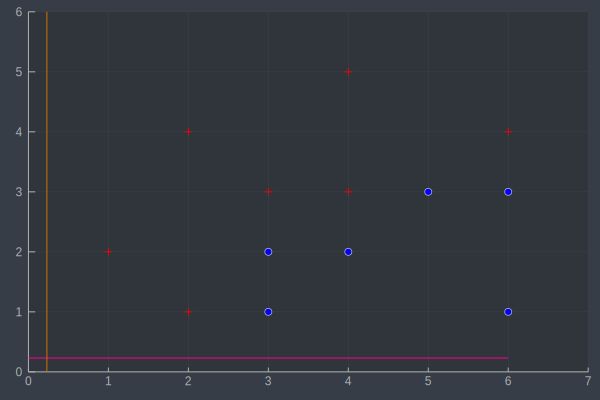

In [15]:
plot!([(0.23076923076923078, 0.0), (0.23076923076923078, 7.0)])

<font size="10">your_text_here</font>